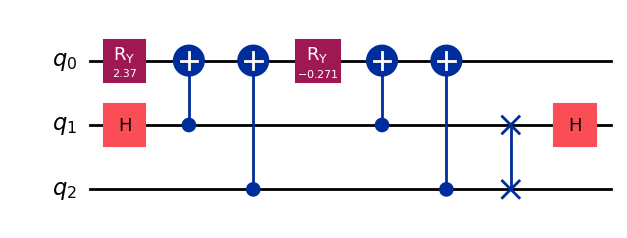

In [16]:
from fable import fable
import numpy as np

# generate a matrix and block encode it
n = 1
N = 2**n
alpha_1 = 1/2 # 0<alpha<1
alpha_2 = 1/4 # 0<alpha<1
phi_1 = np.arccos(alpha_1)+np.arccos(alpha_2)
phi_2 = np.arccos(alpha_1)-np.arccos(alpha_2)
A = np.matrix([[alpha_1, alpha_2], [alpha_2, alpha_1]])
circ, alpha = fable(A, 0)
circ = circ.reverse_bits()

circ.draw('mpl')

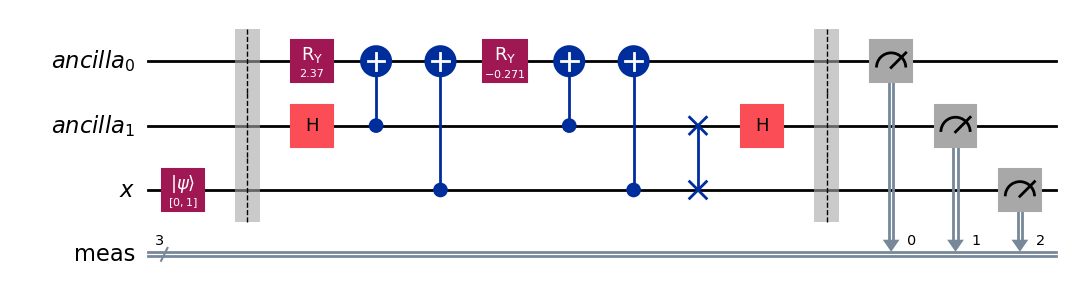

In [17]:
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister


# Create the various registers needed
ancilla = QuantumRegister(2, name='ancilla')
input = QuantumRegister(1, name='x')


# Create an empty circuit with the specified registers
circuit = QuantumCircuit(ancilla, input)
vector = [0,1] # Note: this vector is already normalized
initial_state = vector/np.linalg.norm(vector)
circuit.initialize(initial_state, 2)   

circuit.barrier()
circuit = circuit.compose(circ)
circuit.measure_all()

circuit.draw('mpl')

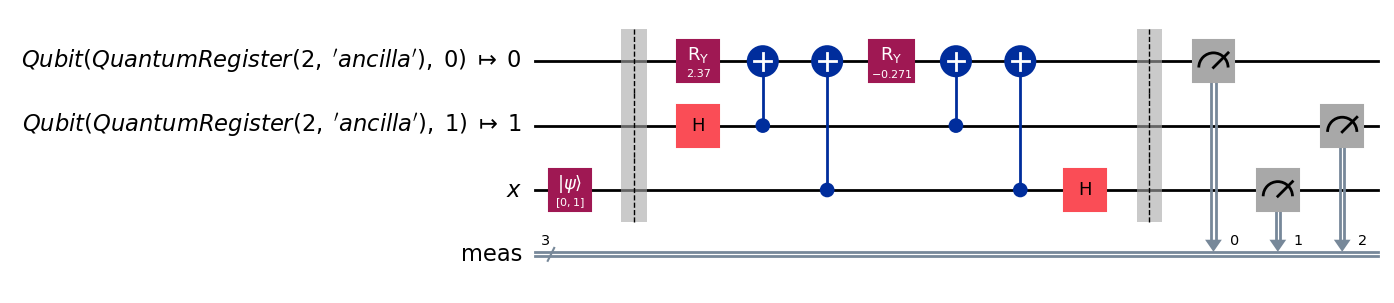

In [18]:
from qiskit.compiler import transpile
from qiskit.visualization import plot_histogram
simulator = AerSimulator()
circuit_compiled = transpile(circuit, simulator, optimization_level=3)
circuit_compiled.draw('mpl')

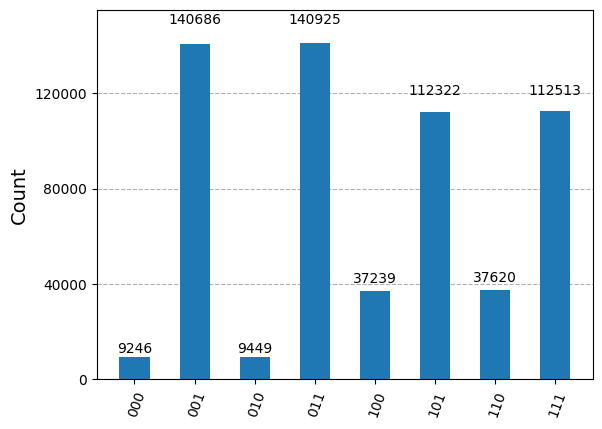

In [19]:
shots = 600000
job_sim = simulator.run(circuit_compiled, shots=shots)
#Get the result of the execution
result_sim = job_sim.result()

counts = result_sim.get_counts(circuit_compiled)

plot_histogram(counts)

In [20]:
# only if ancilla 0 and ancilla 1 are both 0 we get Ax on the qubit

# Note: in this circuit there are three qubits
# q_0 = ancilla 0
# q_1 = ancilla 1
# q_2 = j
# That are ordered like this in the results: ['q_2 q_1 q_0']
# So q_2 is the Most Significant "bit" and q_0 is the Least Significant "bit"
# This is the standard convention in qiskit.
x_0 = counts['000']
x_1 = counts['100']

# We get a result which is close to 4
print(str(x_1/x_0)+ "\n")
print("succ. prob is: " + str((x_0+x_1)/shots))

4.027579493835172

succ. prob is: 0.077475
